In [1]:
# Importo las librerías más importantes a usar

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

C:\Users\ATova\AppData\Local\Temp\ipykernel_18732\1579293269.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(1197, 15)

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Columnas y su significado

*01 date: Fecha en MM-DD-AAAA*

*02 day: Día de la semana*

*03 quarter: Una porción del mes. Un mes se dividió entre 4 y 5 partes.*

*04 department: Departamento asociado a la instancia*

*05 team_no: número de equipo asociado con la instancia*

*06 no_of_workers: Número de trabajadores en cada equipo*

*07 no_of_style_change: Número de cambios en el estilo de un producto en particular*

*08 target_productivity: Productividad objetivo establecida para cada equipo para cada día.*

*09 smv: Valor de minutos estándar, es el tiempo asignado para una tarea*

*10 wip: Trabajo en progreso. Incluye la cantidad de elementos sin terminar.*

*11 over_time: Representa la cantidad de tiempo extra de cada equipo en minutos.*

*12 incentive: Representa la cantidad de incentivo financiero (en unidades monetarias).*

*13 idle_time: La cantidad de tiempo durante el cual la producción estuvo interrumpida.*

*14 idle_men: El número de trabajadores que estaban inactivos debido a la interrupción de la producción.*

*15 actual_productivity: El % real de productividad que entregaron los trabajadores. Varía de 0 a 1.*


In [5]:
# Se verifica si hay valores nulos en el DataFrame
valores_nulos = df.isnull().sum()

print("Valores nulos por columna:")
print(valores_nulos)


Valores nulos por columna:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


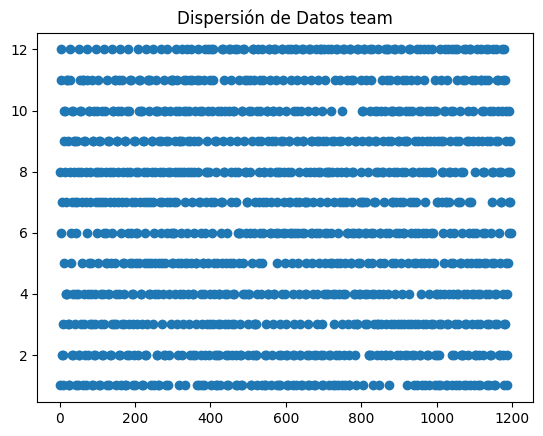

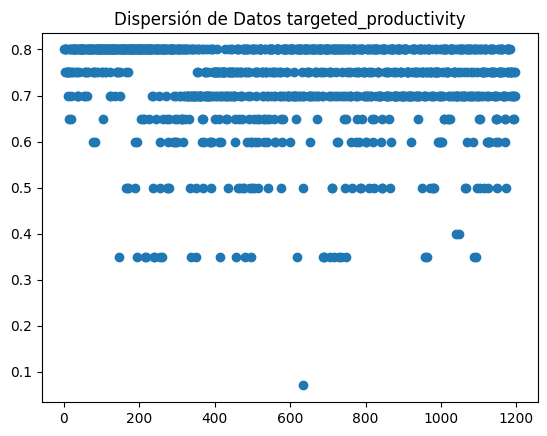

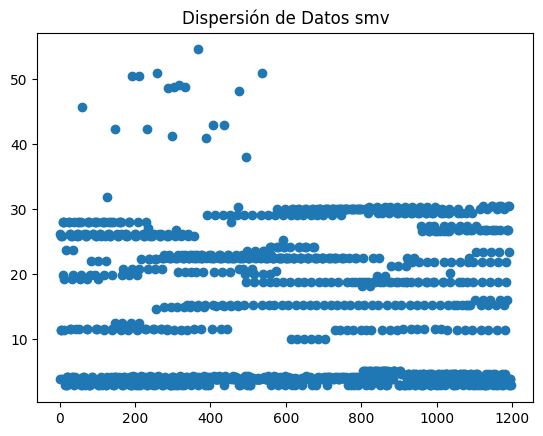

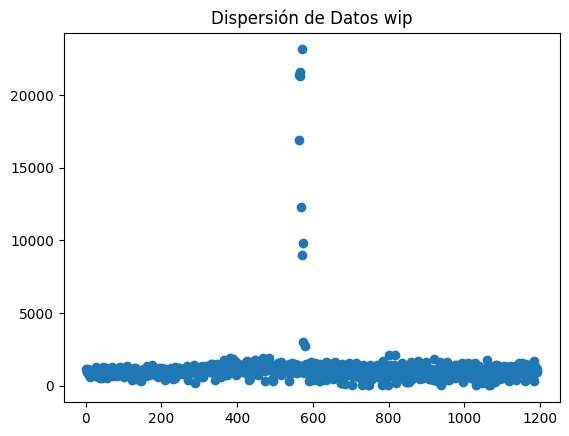

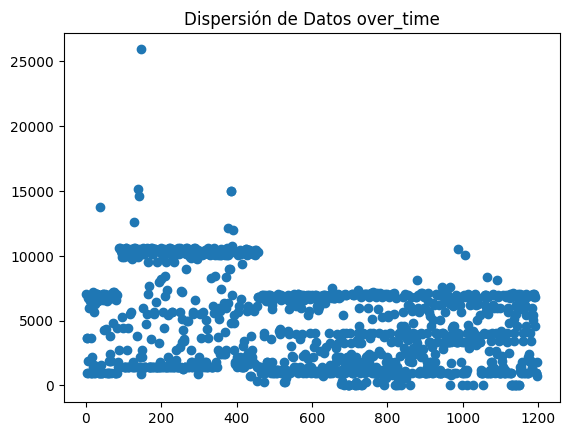

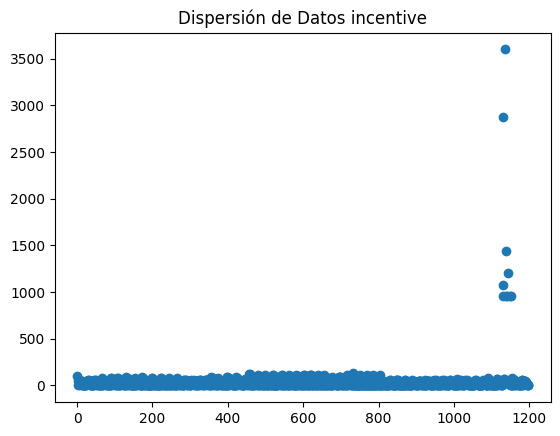

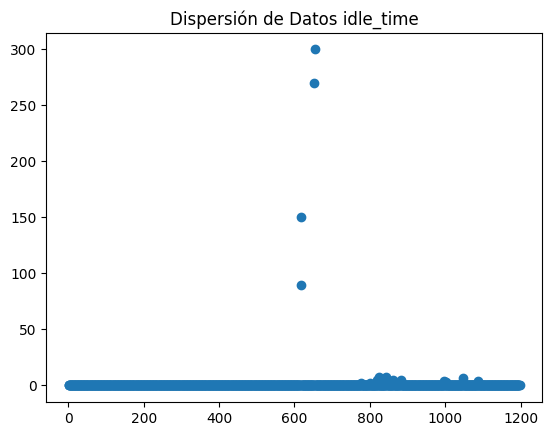

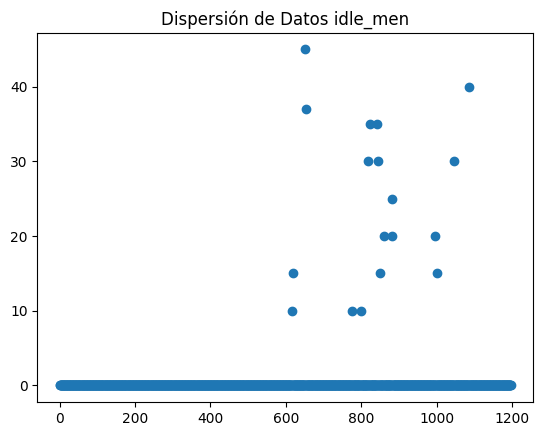

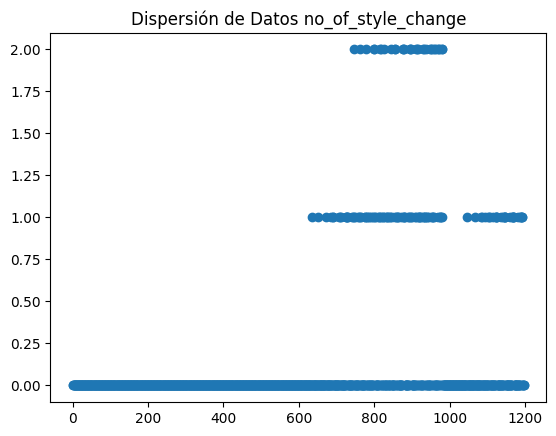

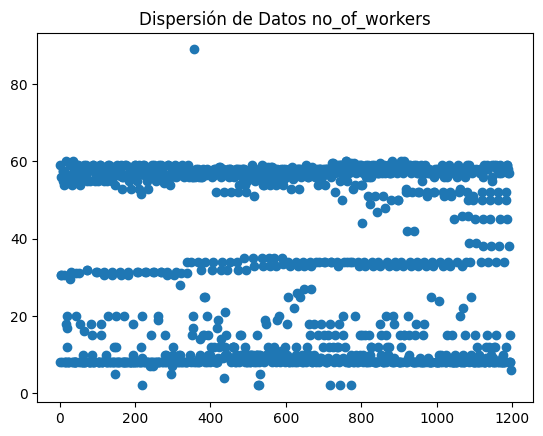

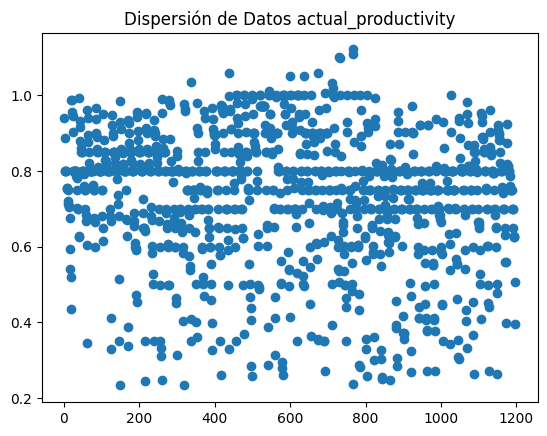

In [6]:
valorx = range(1, len(df)+1)

plt.scatter(valorx, df['team'])
plt.title("Dispersión de Datos team")
plt.show()

plt.scatter(valorx, df['targeted_productivity'])
plt.title("Dispersión de Datos targeted_productivity")
plt.show()

plt.scatter(valorx, df['smv'])
plt.title("Dispersión de Datos smv")
plt.show()

plt.scatter(valorx, df['wip'])
plt.title("Dispersión de Datos wip")
plt.show()

plt.scatter(valorx, df['over_time'])
plt.title("Dispersión de Datos over_time")
plt.show()

plt.scatter(valorx, df['incentive'])
plt.title("Dispersión de Datos incentive")
plt.show()

plt.scatter(valorx, df['idle_time'])
plt.title("Dispersión de Datos idle_time")
plt.show()

plt.scatter(valorx, df['idle_men'])
plt.title("Dispersión de Datos idle_men")
plt.show()

plt.scatter(valorx, df['no_of_style_change'])
plt.title("Dispersión de Datos no_of_style_change")
plt.show()

plt.scatter(valorx, df['no_of_workers'])
plt.title("Dispersión de Datos no_of_workers")
plt.show()

plt.scatter(valorx, df['actual_productivity'])
plt.title("Dispersión de Datos actual_productivity")
plt.show()


In [7]:
# Se crea un nuevo data frame en el que se eliminarán datos atípicos buscando que la distribución de los 
# gráficos de dispersión sea más parecida

dfnuevo=pd.read_csv('data_modificada.csv')

In [8]:
dfnuevo=dfnuevo.loc[dfnuevo['targeted_productivity'] >= 0.3]
dfnuevo=dfnuevo.loc[dfnuevo['smv'] <=35]
dfnuevo=dfnuevo.loc[dfnuevo['over_time'] <=20000]
dfnuevo=dfnuevo.loc[dfnuevo['incentive'] <=500]
dfnuevo=dfnuevo.loc[dfnuevo['idle_time'] <=50]
dfnuevo=dfnuevo.loc[dfnuevo['idle_men'] <=5]
dfnuevo=dfnuevo.loc[dfnuevo['no_of_workers'] <=75]

In [9]:
# Se verifica si hay valores nulos en el DataFrame
valores_nulos_nuevo = dfnuevo.isnull().sum()

print("Valores nulos por columna:")
print(valores_nulos_nuevo)

Valores nulos por columna:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      496
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


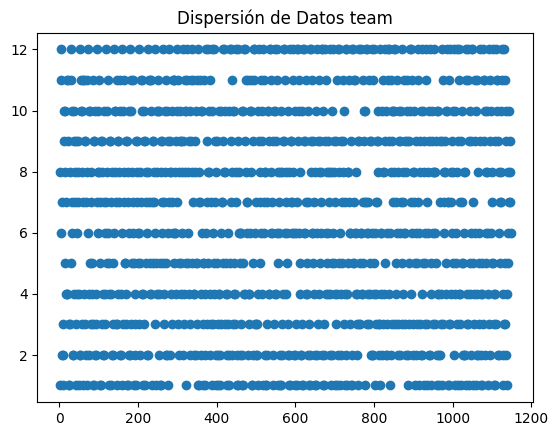

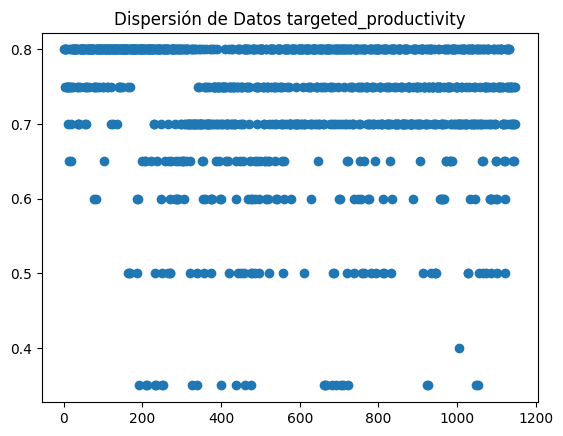

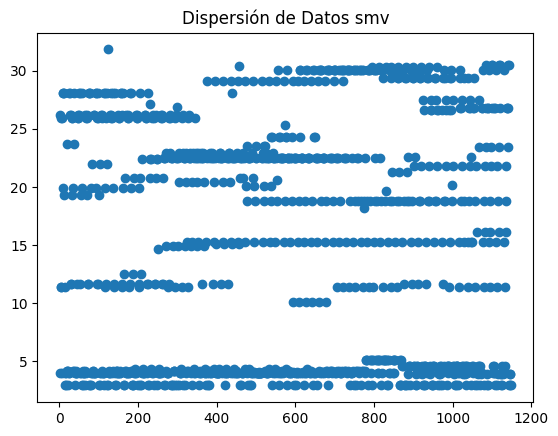

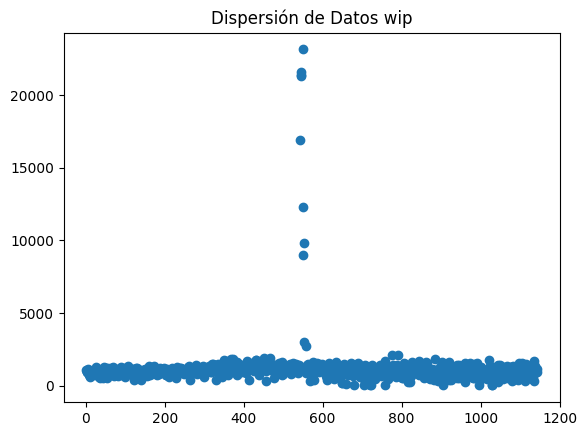

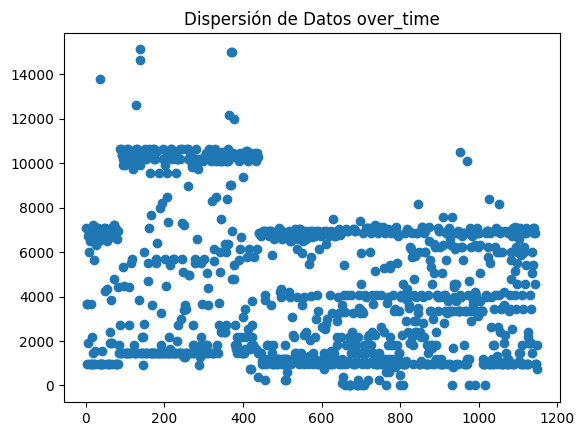

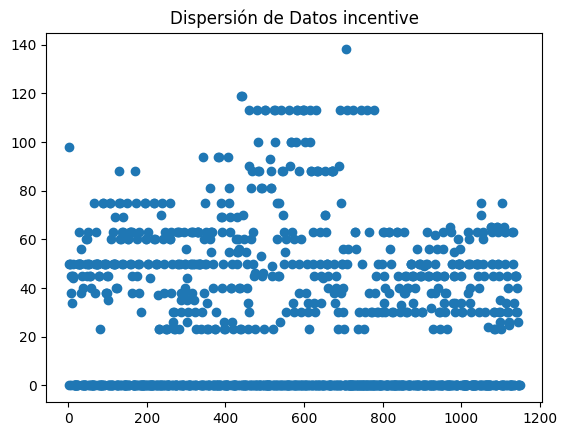

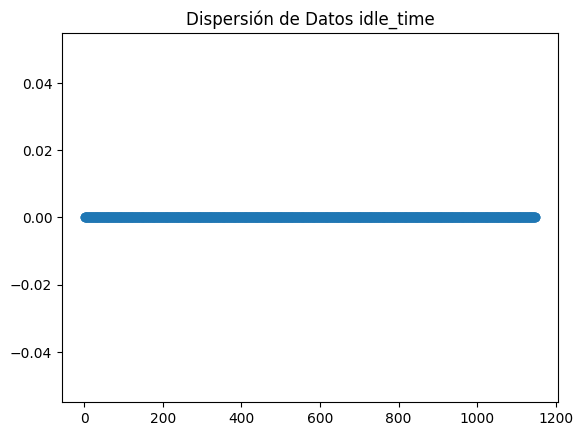

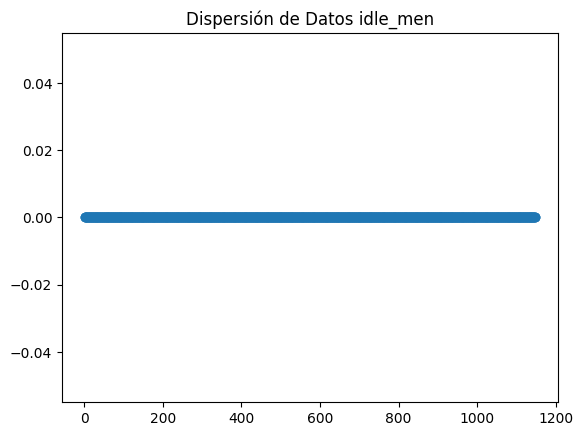

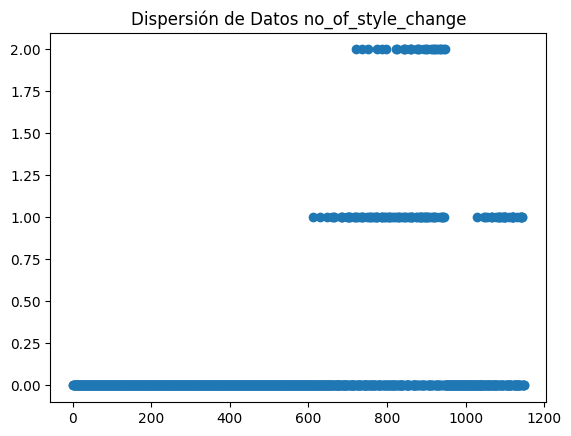

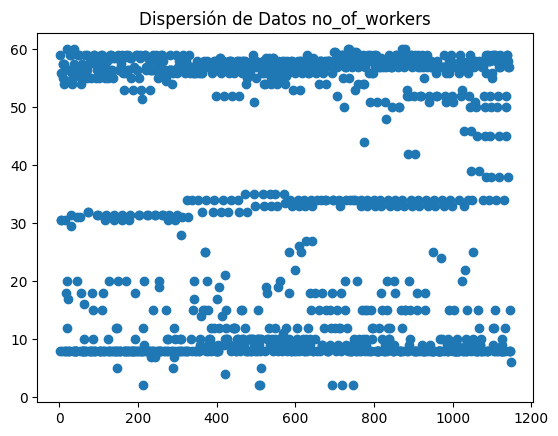

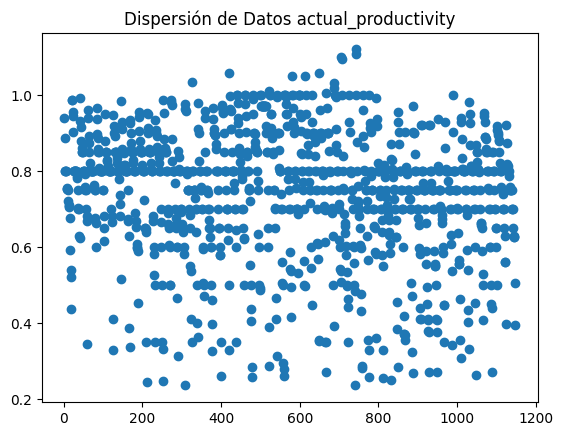

In [10]:
valorxnuevo = range(1, len(dfnuevo)+1)

plt.scatter(valorxnuevo, dfnuevo['team'])
plt.title("Dispersión de Datos team")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['targeted_productivity'])
plt.title("Dispersión de Datos targeted_productivity")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['smv'])
plt.title("Dispersión de Datos smv")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['wip'])
plt.title("Dispersión de Datos wip")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['over_time'])
plt.title("Dispersión de Datos over_time")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['incentive'])
plt.title("Dispersión de Datos incentive")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['idle_time'])
plt.title("Dispersión de Datos idle_time")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['idle_men'])
plt.title("Dispersión de Datos idle_men")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['no_of_style_change'])
plt.title("Dispersión de Datos no_of_style_change")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['no_of_workers'])
plt.title("Dispersión de Datos no_of_workers")
plt.show()

plt.scatter(valorxnuevo, dfnuevo['actual_productivity'])
plt.title("Dispersión de Datos actual_productivity")
plt.show()


In [11]:
dfnuevo

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


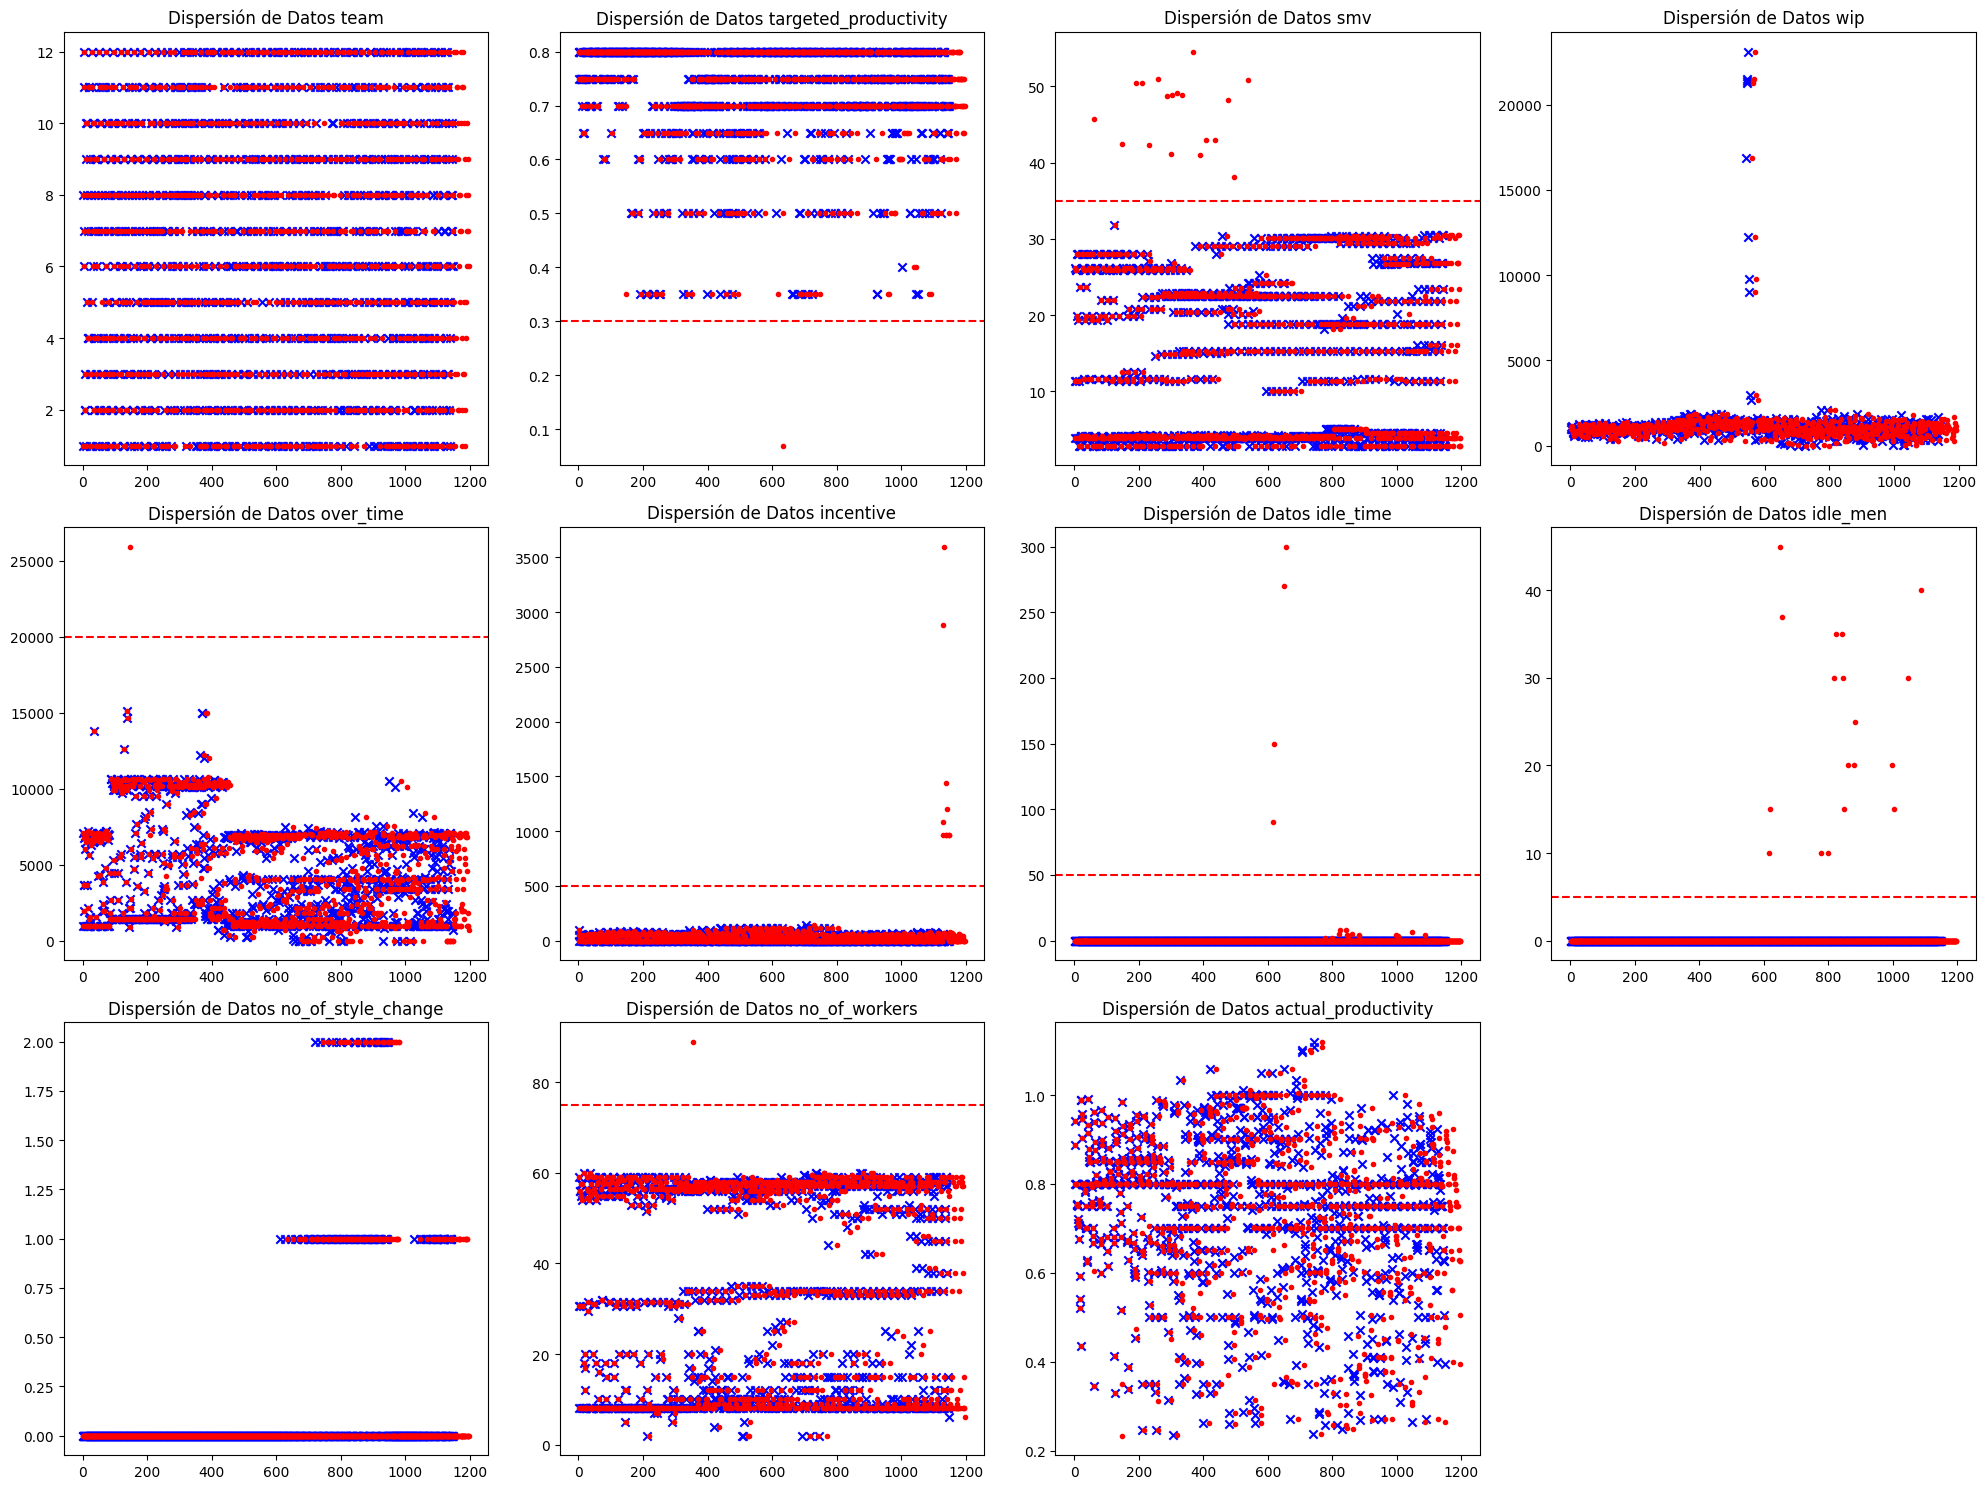

In [12]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

axs[0, 0].scatter(valorxnuevo, dfnuevo['team'], marker='x', color='blue')
axs[0, 0].set_title("Dispersión de Datos team")

axs[0, 1].scatter(valorxnuevo, dfnuevo['targeted_productivity'], marker='x', color='blue')
axs[0, 1].set_title("Dispersión de Datos targeted_productivity")
axs[0, 1].axhline(y=0.3, color='red', linestyle='--')

axs[0, 2].scatter(valorxnuevo, dfnuevo['smv'], marker='x', color='blue')
axs[0, 2].set_title("Dispersión de Datos smv")
axs[0, 2].axhline(y=35, color='red', linestyle='--')

axs[0, 3].scatter(valorxnuevo, dfnuevo['wip'], marker='x', color='blue')
axs[0, 3].set_title("Dispersión de Datos wip")

axs[1, 0].scatter(valorxnuevo, dfnuevo['over_time'], marker='x', color='blue')
axs[1, 0].set_title("Dispersión de Datos over_time")
axs[1, 0].axhline(y=20000, color='red', linestyle='--')

axs[1, 1].scatter(valorxnuevo, dfnuevo['incentive'], marker='x', color='blue')
axs[1, 1].set_title("Dispersión de Datos incentive")
axs[1, 1].axhline(y=500, color='red', linestyle='--')

axs[1, 2].scatter(valorxnuevo, dfnuevo['idle_time'], marker='x', color='blue')
axs[1, 2].set_title("Dispersión de Datos idle_time")
axs[1, 2].axhline(y=50, color='red', linestyle='--')

axs[1, 3].scatter(valorxnuevo, dfnuevo['idle_men'], marker='x', color='blue')
axs[1, 3].set_title("Dispersión de Datos idle_men")
axs[1, 3].axhline(y=5, color='red', linestyle='--')

axs[2, 0].scatter(valorxnuevo, dfnuevo['no_of_style_change'], marker='x', color='blue')
axs[2, 0].set_title("Dispersión de Datos no_of_style_change")

axs[2, 1].scatter(valorxnuevo, dfnuevo['no_of_workers'], marker='x', color='blue')
axs[2, 1].set_title("Dispersión de Datos no_of_workers")
axs[2, 1].axhline(y=75, color='red', linestyle='--')

axs[2, 2].scatter(valorxnuevo, dfnuevo['actual_productivity'], marker='x', color='blue')
axs[2, 2].set_title("Dispersión de Datos actual_productivity")

axs[2, 3].axis('off') 

axs[0, 0].scatter(valorx, df['team'], marker='.', color='red')
axs[0, 1].scatter(valorx, df['targeted_productivity'], marker='.', color='red')
axs[0, 2].scatter(valorx, df['smv'], marker='.', color='red')
axs[0, 3].scatter(valorx, df['wip'], marker='.', color='red')
axs[1, 0].scatter(valorx, df['over_time'], marker='.', color='red')
axs[1, 1].scatter(valorx, df['incentive'], marker='.', color='red')
axs[1, 2].scatter(valorx, df['idle_time'], marker='.', color='red')
axs[1, 3].scatter(valorx, df['idle_men'], marker='.', color='red')
axs[2, 0].scatter(valorx, df['no_of_style_change'], marker='.', color='red')
axs[2, 1].scatter(valorx, df['no_of_workers'], marker='.', color='red')
axs[2, 2].scatter(valorx, df['actual_productivity'], marker='.', color='red')

axs[0, 0].set_title("Dispersión de Datos team")
axs[0, 1].set_title("Dispersión de Datos targeted_productivity")
axs[0, 2].set_title("Dispersión de Datos smv")
axs[0, 3].set_title("Dispersión de Datos wip")
axs[1, 0].set_title("Dispersión de Datos over_time")
axs[1, 1].set_title("Dispersión de Datos incentive")
axs[1, 2].set_title("Dispersión de Datos idle_time")
axs[1, 3].set_title("Dispersión de Datos idle_men")
axs[2, 0].set_title("Dispersión de Datos no_of_style_change")
axs[2, 1].set_title("Dispersión de Datos no_of_workers")
axs[2, 2].set_title("Dispersión de Datos actual_productivity")

plt.tight_layout()
plt.show()

## DataFrame con los datos "limpios" y sin el wip

In [13]:
dflimpio=dfnuevo.drop(columns=["wip"])
dflimpio

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


## Regresión del wip para llenar sus valores y obtener un nuevo DataFrame

In [14]:
# Se hace la regresión explicando el wip a partir del resto de variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
dfregresion = dfnuevo.select_dtypes(include=['float64', 'int64']).dropna(subset=['wip'])

dfregresion


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...
1187,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [16]:
x=dfregresion.drop(columns=["targeted_productivity","wip","actual_productivity"])
y=dfregresion["wip"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [17]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [18]:
print(linreg.intercept_)
print(linreg.coef_)

b0=linreg.intercept_
b1=linreg.coef_[0]
b2=linreg.coef_[1]
b3=linreg.coef_[2]
b4=linreg.coef_[3]
b5=linreg.coef_[4]
b6=linreg.coef_[5]
b7=linreg.coef_[6]
b8=linreg.coef_[7]

1185.3696953893927
[-3.92933594e+01 -2.48649303e+01 -9.23270161e-03  8.33572064e+00
 -6.07514039e-13  0.00000000e+00 -9.05934323e+01  1.04141411e+01]


In [19]:
list(zip(x, linreg.coef_))

[('team', -39.29335944770959),
 ('smv', -24.864930280716354),
 ('over_time', -0.009232701607032823),
 ('incentive', 8.335720643005175),
 ('idle_time', -6.075140390748857e-13),
 ('idle_men', 0.0),
 ('no_of_style_change', -90.59343232661766),
 ('no_of_workers', 10.414141094331907)]

In [20]:
# Se calcula el wip para cada fila a partir de los betas

betas = {
    "intercepto": 1185.3696953893927,
    'team': -39.29335944770959,
    'smv': -24.864930280716354,
    'over_time': -0.009232701607032823,
    'incentive': 8.335720643005175,
    'idle_time': -6.075140390748857e-13,
    'idle_men': 0.0,
    'no_of_style_change': -90.59343232661766,
    'no_of_workers': 10.414141094331907
}


def calcular_formula(row):
    formula = (
        betas["intercepto"]+
        betas['team'] * row['team'] +
        betas['smv'] * row['smv'] +
        betas['over_time'] * row['over_time'] +
        betas['incentive'] * row['incentive'] +
        betas['idle_time'] * row['idle_time'] +
        betas['idle_men'] * row['idle_men'] +
        betas['no_of_style_change'] * row['no_of_style_change'] +
        betas['no_of_workers'] * row['no_of_workers']
    )
    return formula


In [21]:
dfarreglado=dfnuevo.copy()

for index,row in dfarreglado.iterrows():
    if pd.isnull(row["wip"]):
        dfarreglado.at[index,"wip"]=calcular_formula(row)

dfarreglado

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1122.558246,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,794.777538,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,848.499327,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,887.792686,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,899.214416,1800,0,0.0,0,0,15.0,0.505889


### Se tienen dos DataFrame: uno que no tiene en cuenta el wip (dflimpio) y otro que tiene en cuenta el wip estimado por regresión lineal (dfarreglado)

In [22]:
dflimpio

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [23]:
dfarreglado

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1122.558246,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,794.777538,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,848.499327,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,887.792686,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,899.214416,1800,0,0.0,0,0,15.0,0.505889


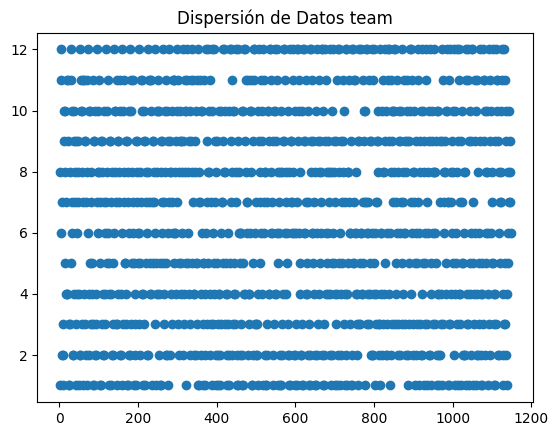

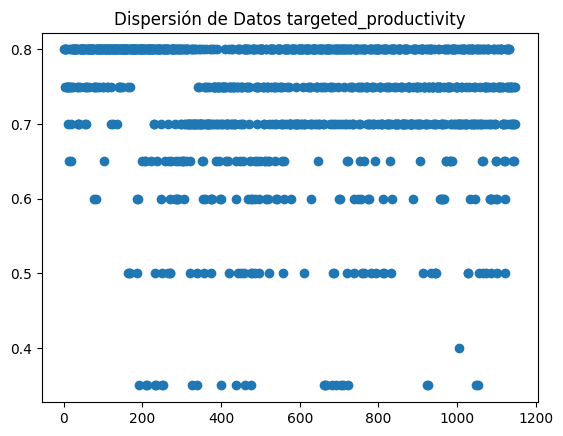

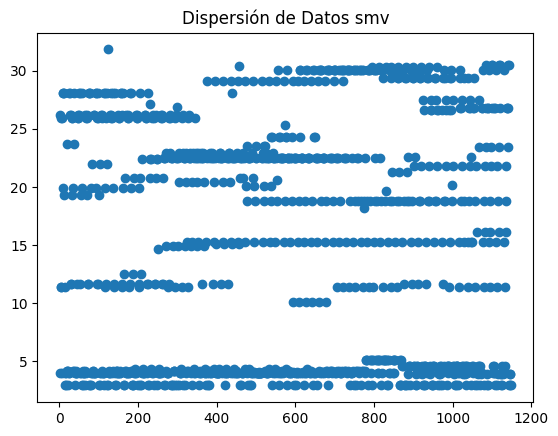

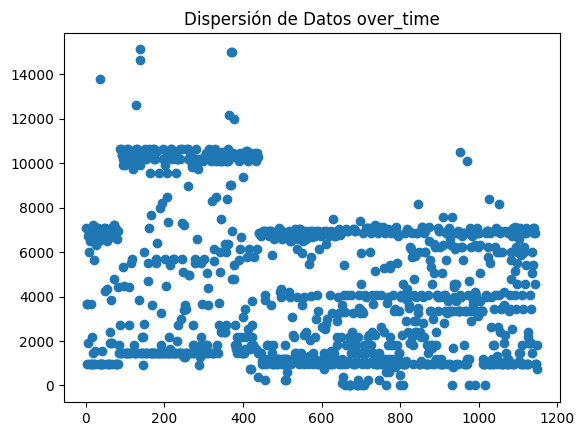

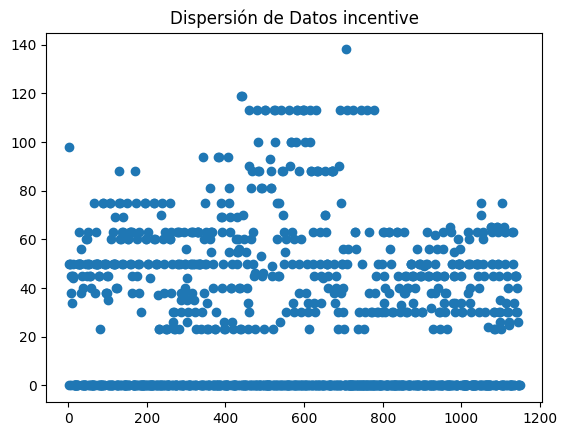

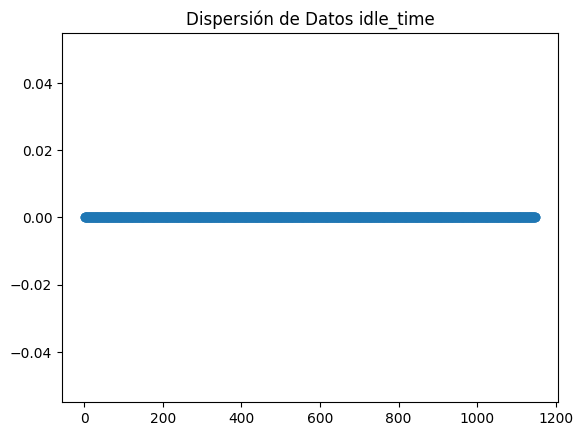

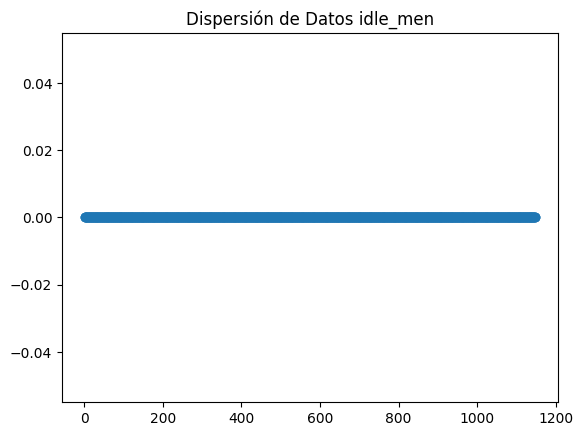

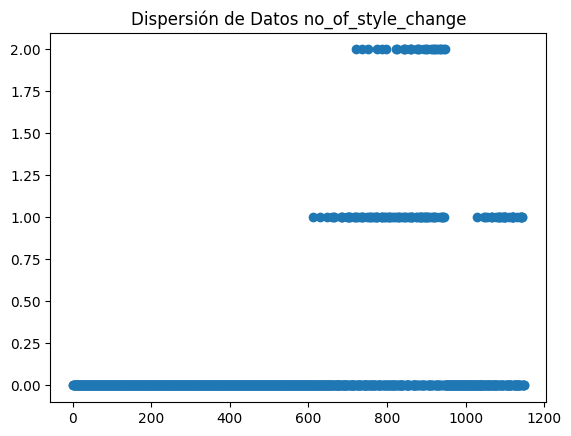

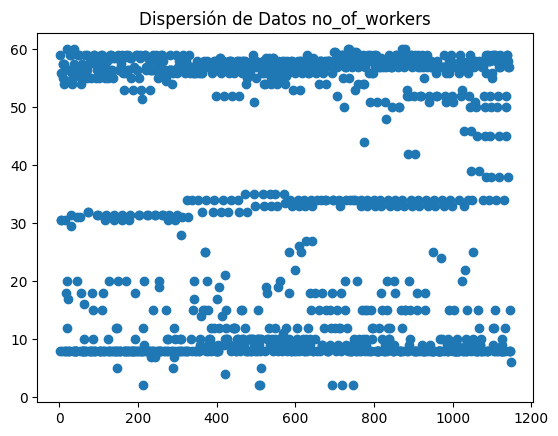

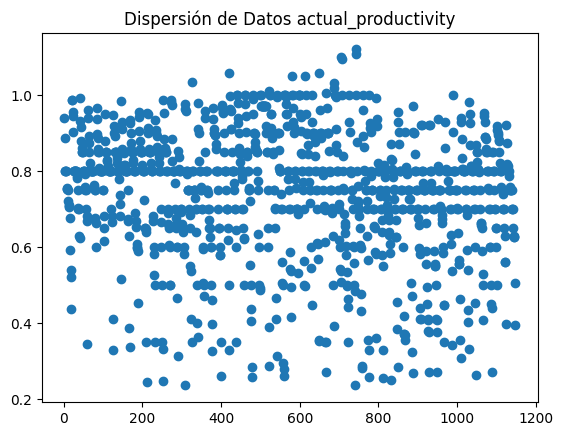

In [24]:
valorxlimpio = range(1, len(dflimpio)+1)

plt.scatter(valorxlimpio, dflimpio['team'])
plt.title("Dispersión de Datos team")
plt.show()

plt.scatter(valorxlimpio, dflimpio['targeted_productivity'])
plt.title("Dispersión de Datos targeted_productivity")
plt.show()

plt.scatter(valorxlimpio, dflimpio['smv'])
plt.title("Dispersión de Datos smv")
plt.show()

plt.scatter(valorxlimpio, dflimpio['over_time'])
plt.title("Dispersión de Datos over_time")
plt.show()

plt.scatter(valorxlimpio, dflimpio['incentive'])
plt.title("Dispersión de Datos incentive")
plt.show()

plt.scatter(valorxlimpio, dflimpio['idle_time'])
plt.title("Dispersión de Datos idle_time")
plt.show()

plt.scatter(valorxlimpio, dflimpio['idle_men'])
plt.title("Dispersión de Datos idle_men")
plt.show()

plt.scatter(valorxlimpio, dflimpio['no_of_style_change'])
plt.title("Dispersión de Datos no_of_style_change")
plt.show()

plt.scatter(valorxlimpio, dflimpio['no_of_workers'])
plt.title("Dispersión de Datos no_of_workers")
plt.show()

plt.scatter(valorxlimpio, dflimpio['actual_productivity'])
plt.title("Dispersión de Datos actual_productivity")
plt.show()


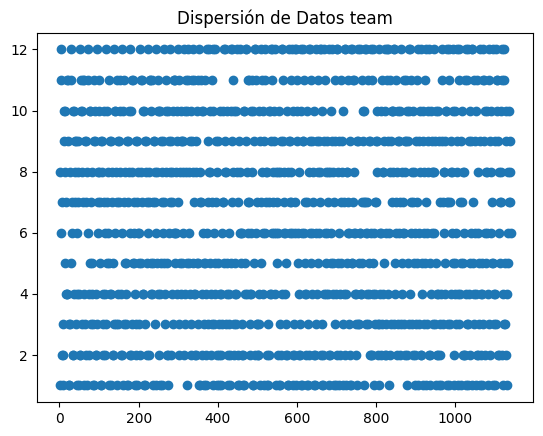

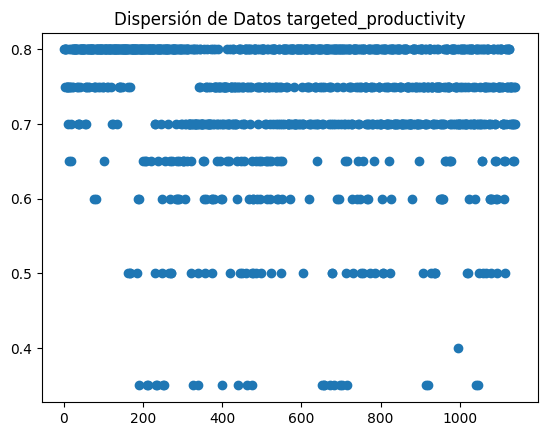

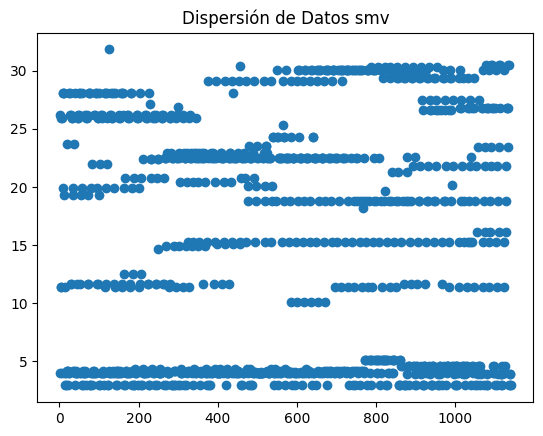

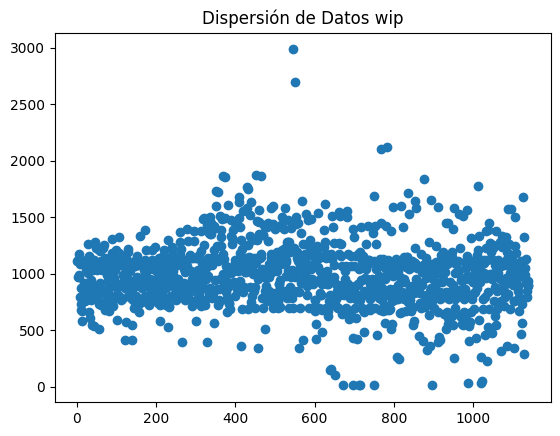

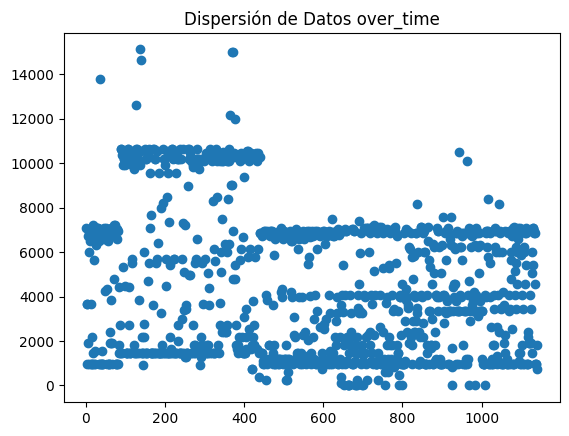

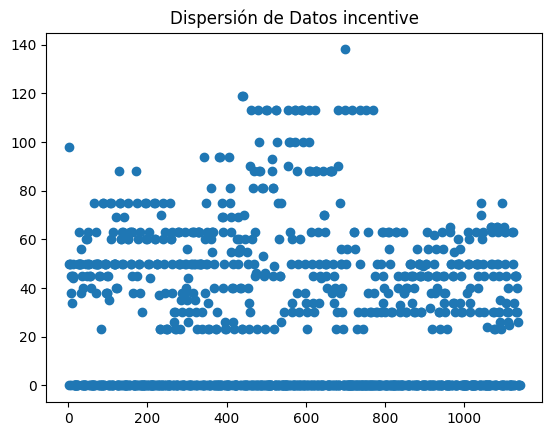

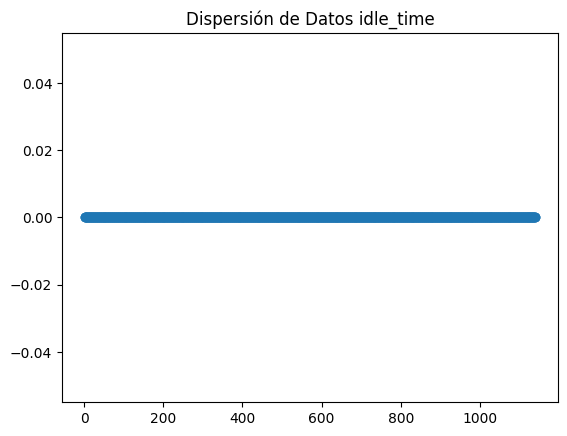

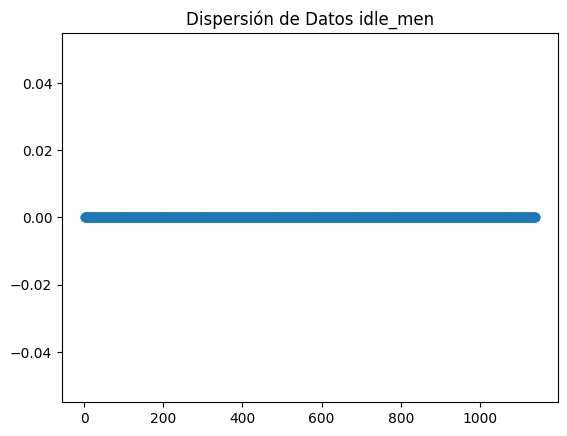

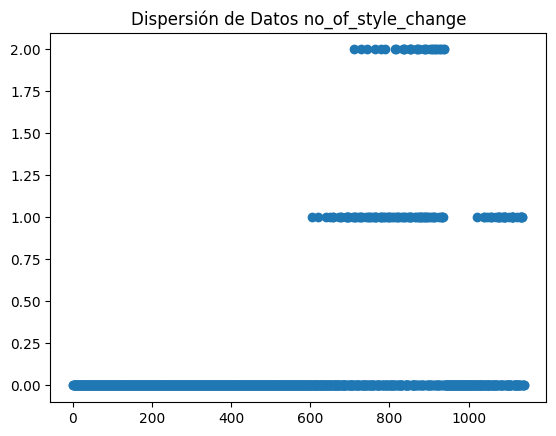

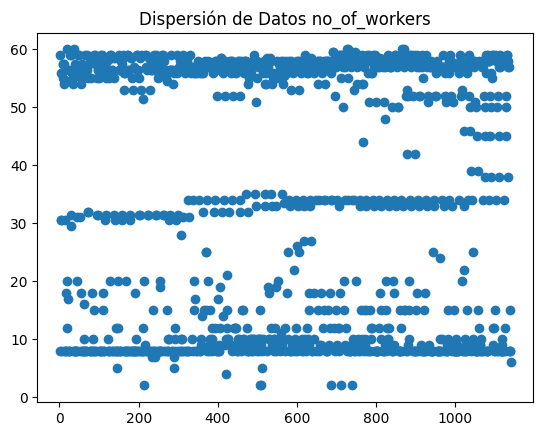

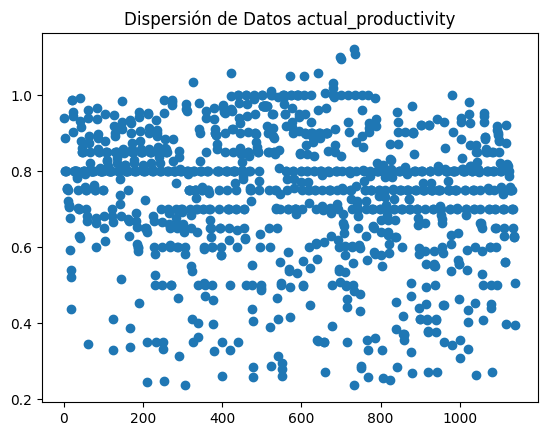

In [25]:
dfarreglado=dfarreglado.loc[dfarreglado['wip'] <= 5000]

valorxarreglado = range(1, len(dfarreglado)+1)

plt.scatter(valorxarreglado, dfarreglado['team'])
plt.title("Dispersión de Datos team")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['targeted_productivity'])
plt.title("Dispersión de Datos targeted_productivity")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['smv'])
plt.title("Dispersión de Datos smv")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['wip'])
plt.title("Dispersión de Datos wip")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['over_time'])
plt.title("Dispersión de Datos over_time")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['incentive'])
plt.title("Dispersión de Datos incentive")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['idle_time'])
plt.title("Dispersión de Datos idle_time")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['idle_men'])
plt.title("Dispersión de Datos idle_men")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['no_of_style_change'])
plt.title("Dispersión de Datos no_of_style_change")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['no_of_workers'])
plt.title("Dispersión de Datos no_of_workers")
plt.show()

plt.scatter(valorxarreglado, dfarreglado['actual_productivity'])
plt.title("Dispersión de Datos actual_productivity")
plt.show()


In [26]:

dflimpio.to_csv("DataFrameLimpio.csv",index=False,encoding="utf-8")

In [27]:
dflimpio = pd.read_csv('DataFrameLimpio.csv')

In [28]:
for i in range(len(dflimpio)): 
    if dflimpio["department"][i]=="finishing ":
        dflimpio["department"][i]="finishing"

C:\Users\ATova\AppData\Local\Temp\ipykernel_18732\1144090244.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dflimpio["department"][i]="finishing"
C:\Users\ATova\AppData\Local\Temp\ipykernel_18732\1144090244.py:3: SettingWithCopyWarning:

In [29]:
dflimpio.to_csv("DataFrameLimpio.csv",index=False,encoding="utf-8")

In [30]:
dfarreglado.to_csv("DataFrameArreglado.csv",index=False,encoding="utf-8")

In [31]:
dfarreglado = pd.read_csv('DataFrameArreglado.csv')

In [32]:
for i in range(len(dfarreglado)): 
    if dfarreglado["department"][i]=="finishing ":
        dfarreglado["department"][i]="finishing"

C:\Users\ATova\AppData\Local\Temp\ipykernel_18732\891297312.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfarreglado["department"][i]="finishing"
C:\Users\ATova\AppData\Local\Temp\ipykernel_18732\891297312.py:3: SettingWithCopyWarning

In [33]:
dfarreglado.to_csv("DataFrameArreglado.csv",index=False,encoding="utf-8")